<a href="https://colab.research.google.com/github/nelsooooon/titanic-survival-prediction/blob/main/src/titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project**: Titanic Survival Prediction

**Dataset**: Titanic-Dataset.csv

# **Import Library**

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

# **Data Loading**

In [62]:
path  = '/content/Titanic-Dataset.csv'
df = pd.read_csv(path)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [64]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# **Exploratory Data Analysis (EDA)**

In [65]:
sns.set_style('whitegrid')

In [66]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

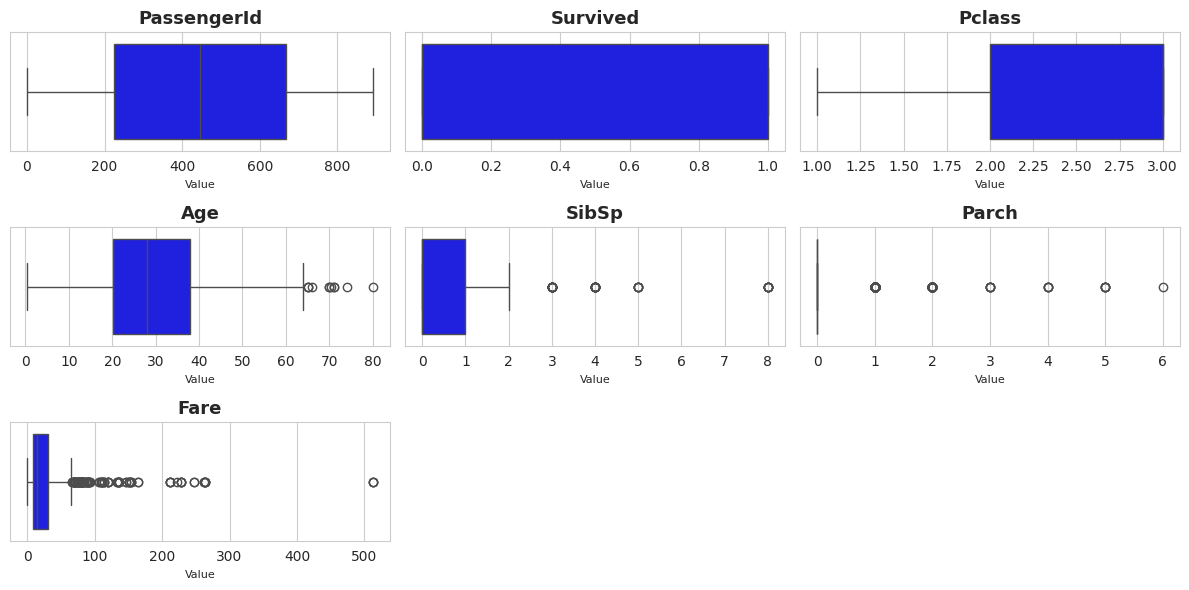

In [67]:
ncols = 3
nrows = (len(numerical_cols) + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 6))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i], color='blue')
    axes[i].set_title(col, size=13, weight='bold')
    axes[i].set_xlabel('Value', size=8)

for i in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[i])

fig.tight_layout()
plt.show()

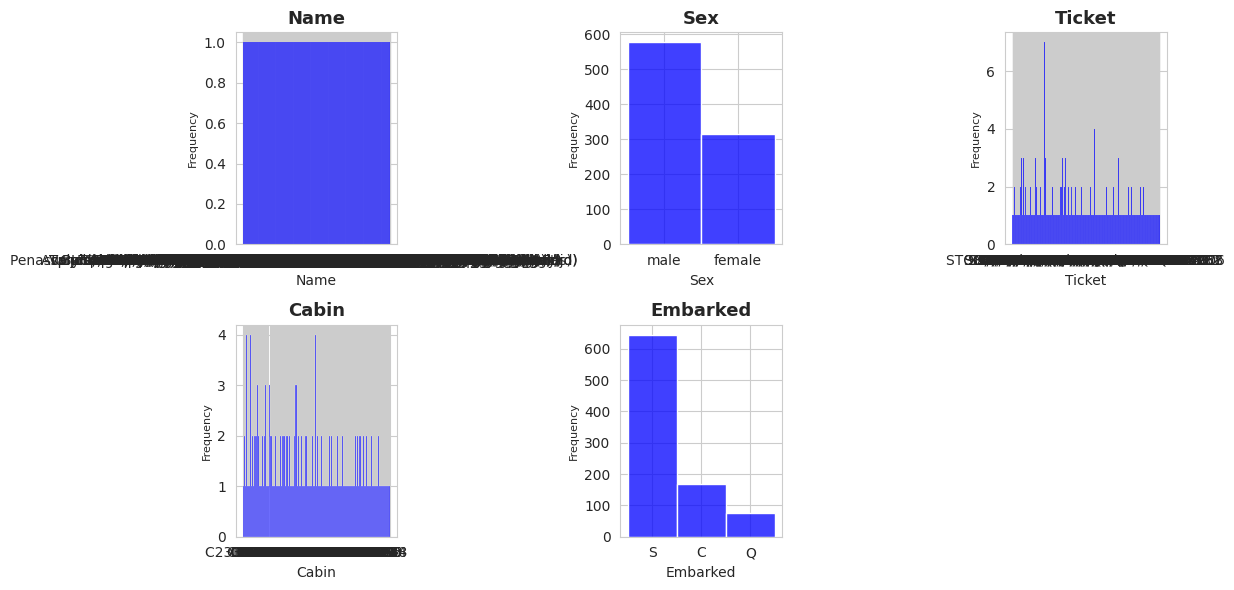

In [68]:
ncols = 3
nrows = (len(categorical_cols) + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 6))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.histplot(x=col, data=df, ax=axes[i], color='blue')
    axes[i].set_title(col, size=13, weight='bold')
    axes[i].set_ylabel('Frequency', size=8)

for i in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

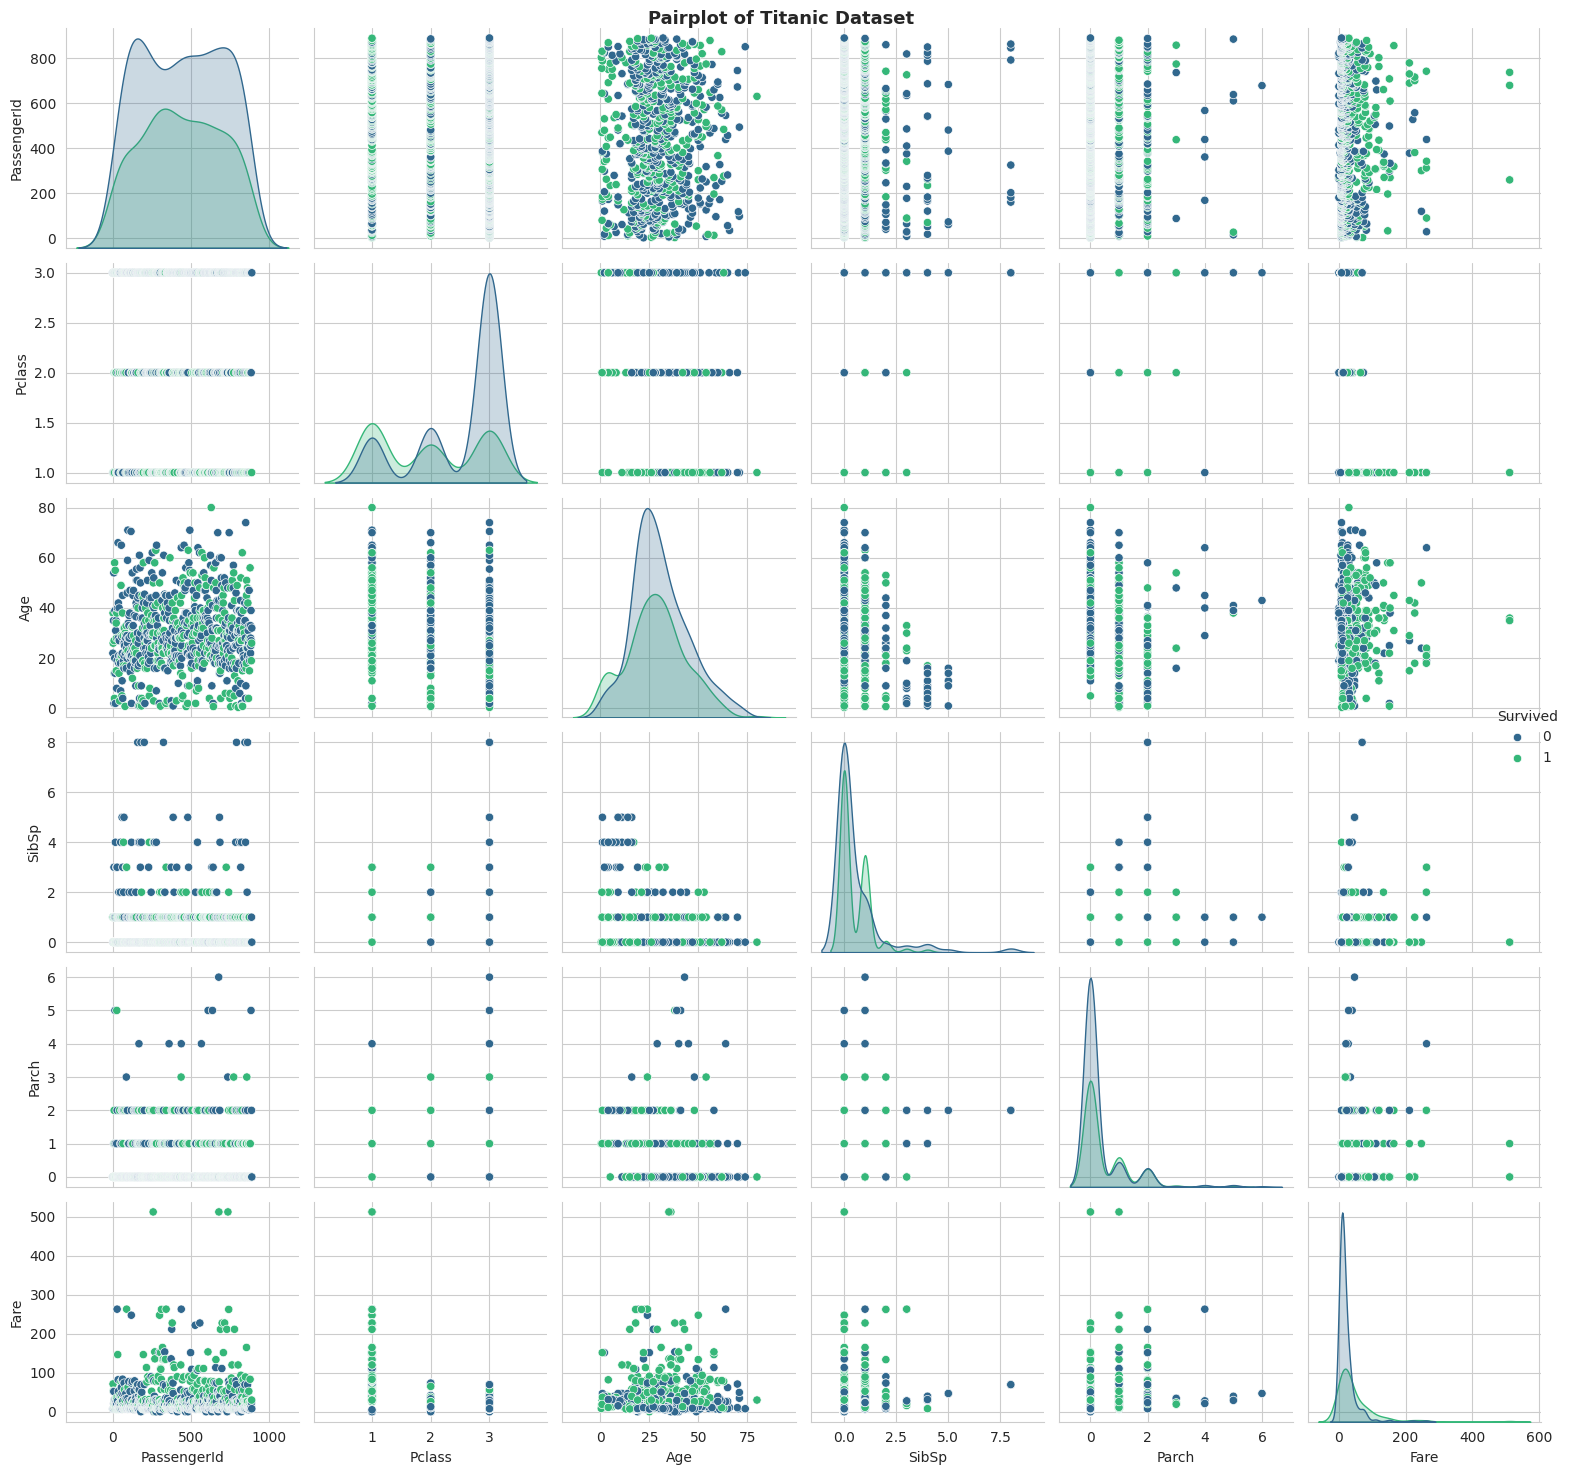

In [69]:
sns.pairplot(df, hue='Survived', palette='viridis')
plt.suptitle('Pairplot of Titanic Dataset', size=13, weight='bold')

plt.tight_layout()
plt.show()

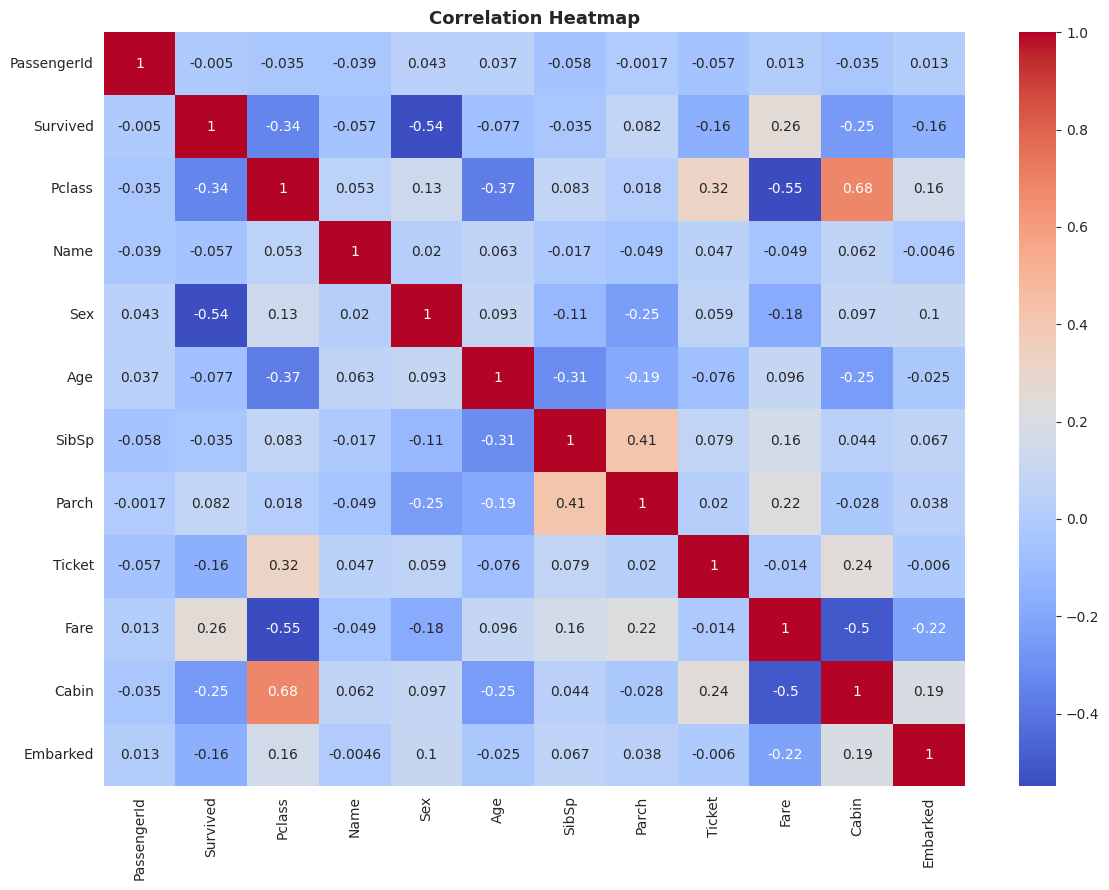

In [70]:
df_lencoder = df.copy()

for col in categorical_cols:
    le = LabelEncoder()
    df_lencoder[col] = le.fit_transform(df[col])

fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(df_lencoder.corr(), annot=True, cmap='coolwarm', ax=ax)
ax.set_title('Correlation Heatmap', size=13, weight='bold')

fig.tight_layout()
plt.show()

# **Pre-processing**

In [71]:
df_train = df.copy()
df_train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

numerical_cols = df_train.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df_train.select_dtypes(include=['object']).columns.tolist()
target_column = 'Survived'

if target_column in numerical_cols:
   numerical_cols.remove(target_column)
if target_column in categorical_cols:
   categorical_cols.remove(target_column)

df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [72]:
df_train.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [73]:
for col in categorical_cols:
    df_train[col].fillna(df_train[col].mode()[0], inplace=True)
for col in numerical_cols:
    df_train[col].fillna(df_train[col].median(), inplace=True)

df_train.isna().sum()

/tmp/ipython-input-3343323604.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[col].fillna(df_train[col].mode()[0], inplace=True)
/tmp/ipython-input-3343323604.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [74]:
df_train.duplicated().sum()

np.int64(116)

In [75]:
df_train.drop_duplicates(inplace=True)

df_train.duplicated().sum()

np.int64(0)

Feature Engineering

In [76]:
df_train['Family Size'] = df_train['SibSp'] + df_train['Parch'] + 1

df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family Size
0,0,3,male,22.0,1,0,7.2500,S,2
1,1,1,female,38.0,1,0,71.2833,C,2
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,1


In [77]:
df_train['Fare Per Person'] = df_train['Fare'] / df_train['Family Size']

df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family Size,Fare Per Person
0,0,3,male,22.0,1,0,7.2500,S,2,3.62500
1,1,1,female,38.0,1,0,71.2833,C,2,35.64165
2,1,3,female,26.0,0,0,7.9250,S,1,7.92500
3,1,1,female,35.0,1,0,53.1000,S,2,26.55000
4,0,3,male,35.0,0,0,8.0500,S,1,8.05000


Binning

In [78]:
bins = [0, 12, 19, 65, np.inf]
labels = ['Child', 'Teenager', 'Adult', 'Senior']

df_train['Age Group'] = pd.cut(df_train['Age'], bins=bins, labels=labels)

df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family Size,Fare Per Person,Age Group
0,0,3,male,22.0,1,0,7.2500,S,2,3.62500,Adult
1,1,1,female,38.0,1,0,71.2833,C,2,35.64165,Adult
2,1,3,female,26.0,0,0,7.9250,S,1,7.92500,Adult
3,1,1,female,35.0,1,0,53.1000,S,2,26.55000,Adult
4,0,3,male,35.0,0,0,8.0500,S,1,8.05000,Adult


In [79]:
remove_cols_from_df = ['SibSp', 'Parch', 'Fare', 'Age']
df_train.drop(columns=remove_cols_from_df, inplace=True, errors='ignore')

categorical_cols = ['Sex', 'Embarked', 'Age Group']
numerical_cols = ['Pclass', 'Family Size', 'Fare Per Person']

df_train.head()

,Survived,Pclass,Sex,Embarked,Family Size,Fare Per Person,Age Group
0,0,3,male,S,2,3.62500,Adult
1,1,1,female,C,2,35.64165,Adult
2,1,3,female,S,1,7.92500,Adult
3,1,1,female,S,2,26.55000,Adult
4,0,3,male,S,1,8.05000,Adult


Encoding + Scaling

In [80]:
df_train_encoded = df_train.copy()

for col in categorical_cols:
    le = LabelEncoder()
    df_train_encoded[col] = le.fit_transform(df_train_encoded[col])

df_train_encoded.head()

,Survived,Pclass,Sex,Embarked,Family Size,Fare Per Person,Age Group
0,0,3,1,2,2,3.62500,0
1,1,1,0,0,2,35.64165,0
2,1,3,0,2,1,7.92500,0
3,1,1,0,2,2,26.55000,0
4,0,3,1,2,1,8.05000,0


Histogram sebelum standarisasi:


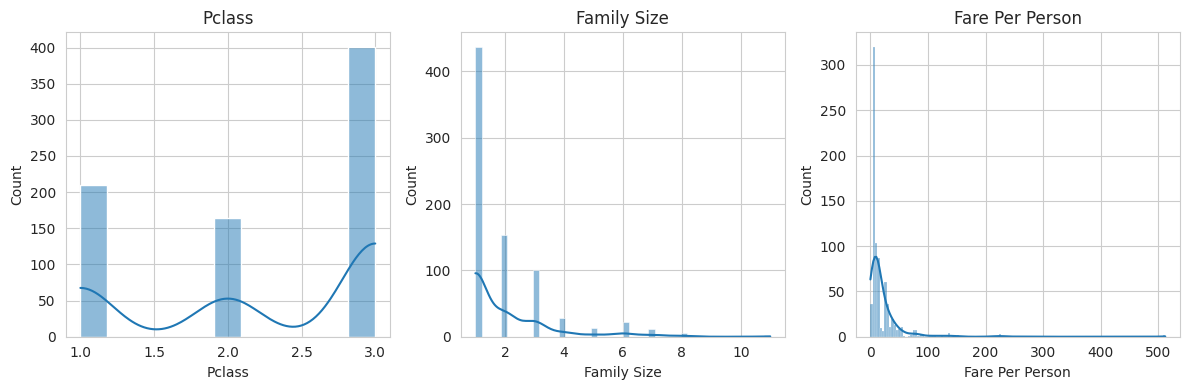

In [81]:
print("Histogram sebelum standarisasi:")

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
axes = axes.flatten()

for i in range(len(numerical_cols)):
    sns.histplot(df_train_encoded[numerical_cols[i]], kde=True, ax=axes[i])
    axes[i].set_title(numerical_cols[i])

fig.tight_layout()
plt.show()

In [82]:
df_train_log = df_train_encoded.copy()
df_train_log[numerical_cols] = np.log1p(df_train_log[numerical_cols])

df_train_log.head()

,Survived,Pclass,Sex,Embarked,Family Size,Fare Per Person,Age Group
0,0,1.386294,1,2,1.098612,1.531476,0
1,1,0.693147,0,0,1.098612,3.601186,0
2,1,1.386294,0,2,0.693147,2.188856,0
3,1,0.693147,0,2,1.098612,3.316003,0
4,0,1.386294,1,2,0.693147,2.202765,0


In [83]:
df_train_scaled = df_train_log.copy()

scaler = RobustScaler()
df_train_scaled[numerical_cols] = scaler.fit_transform(df_train_scaled[numerical_cols])

df_train_scaled.head()

,Survived,Pclass,Sex,Embarked,Family Size,Fare Per Person,Age Group
0,0,0.0,1,2,1.0,-0.629028,0
1,1,-1.0,0,0,1.0,1.116643,0
2,1,0.0,0,2,0.0,-0.074569,0
3,1,-1.0,0,2,1.0,0.876109,0
4,0,0.0,1,2,0.0,-0.062838,0


Histogram setelah standarisasi:


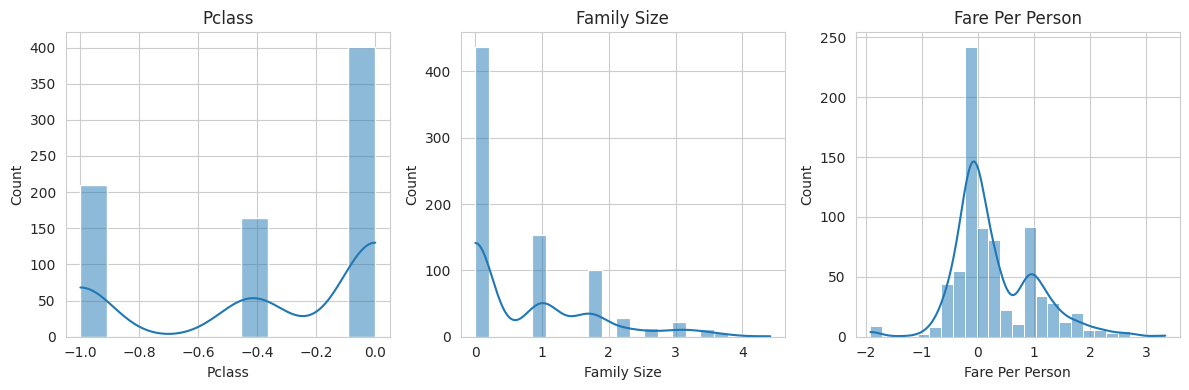

In [84]:
print("Histogram setelah standarisasi:")

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
axes = axes.flatten()

for i in range(len(numerical_cols)):
    sns.histplot(df_train_scaled[numerical_cols[i]], kde=True, ax=axes[i])
    axes[i].set_title(numerical_cols[i])

fig.tight_layout()
plt.show()

# **Modelling**

In [85]:
X = df_train_scaled.drop(columns=['Survived'])
y = df_train_scaled['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [87]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# **Evaluation**

==== Decision Tree Classifier ====
Accuracy: 0.7871
Precision: 0.7878
Recall: 0.7871
F1-Score: 0.7874

----------------------------------------



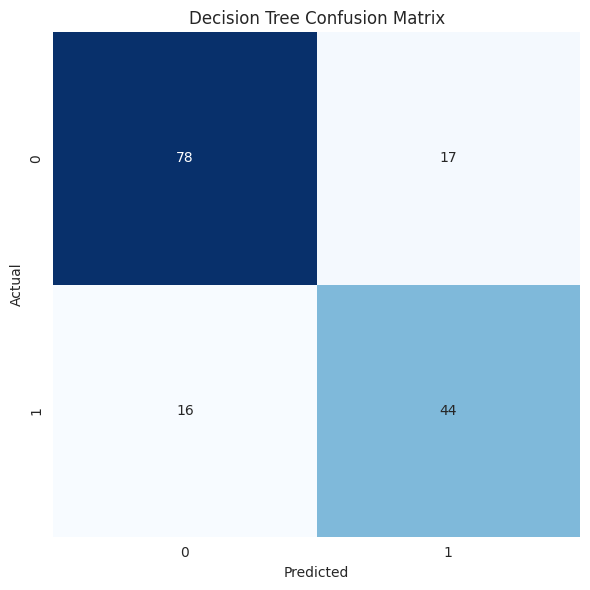

In [88]:
y_pred_dt = model_dt.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)

print("==== Decision Tree Classifier ====")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt, average='weighted'):.4f}")
print("\n" + "-"*40 + "\n")

fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
ax.set_title('Decision Tree Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

fig.tight_layout()
plt.show()

==== Random Forest Classifier ====
Accuracy: 0.7613
Precision: 0.7639
Recall: 0.7613
F1-Score: 0.7623

----------------------------------------



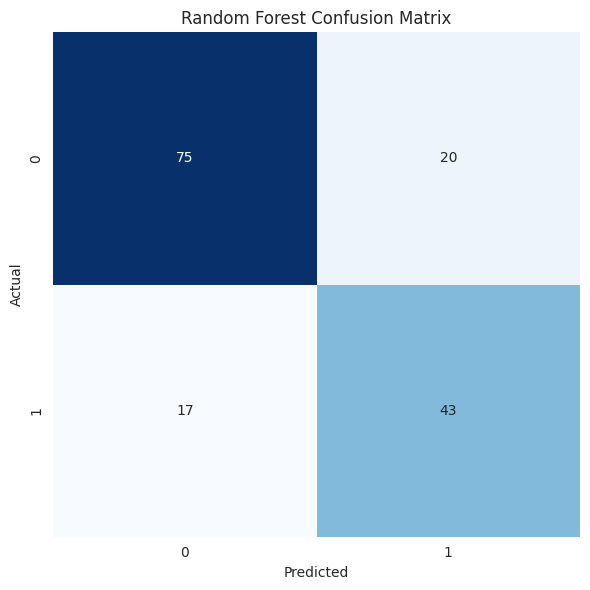

In [89]:
y_pred_rf = model_rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("==== Random Forest Classifier ====")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf, average='weighted'):.4f}")
print("\n" + "-"*40 + "\n")

fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
ax.set_title('Random Forest Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

fig.tight_layout()
plt.show()

HyperParameter Tuning

In [95]:
param_dist = {
    'n_estimators': np.linspace(100, 500, 5, dtype=int),
    'max_depth': np.linspace(10, 50, 5, dtype=int),
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

random_search = RandomizedSearchCV(estimator=model_dt, param_distributions=param_dist, n_iter=20, cv=3, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

print(f"Best parameters (Random Search): {random_search.best_params_}")
best_dt_rs = random_search.best_estimator_

TypeError: RandomizedSearchCV.__init__() missing 1 required positional argument: 'param_distributions'

In [ ]:
y_pred_dt_rs = best_dt_rs.predict(X_test)
cm_dt_rs = confusion_matrix(y_test, y_pred_dt)

print("==== Random Forest Classifier ====")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt_rs):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt_rs, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt_rs, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt_rs, average='weighted'):.4f}")
print("\n" + "-"*40 + "\n")

fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm_dt_rs, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
ax.set_title('Random Search Forest Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

fig.tight_layout()
plt.show()

In [90]:
param_dist = {
    'n_estimators': np.linspace(100, 500, 5, dtype=int),
    'max_depth': np.linspace(10, 50, 5, dtype=int),
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

random_search = RandomizedSearchCV(estimator=model_rf, param_distributions=param_dist, n_iter=20, cv=3, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

print(f"Best parameters (Random Search): {random_search.best_params_}")
best_rf_rs = random_search.best_estimator_

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters (Random Search): {'n_estimators': np.int64(400), 'min_samples_split': 2, 'max_depth': np.int64(10), 'criterion': 'entropy'}


==== Random Forest Classifier ====
Accuracy: 0.7677
Precision: 0.7693
Recall: 0.7677
F1-Score: 0.7684

----------------------------------------



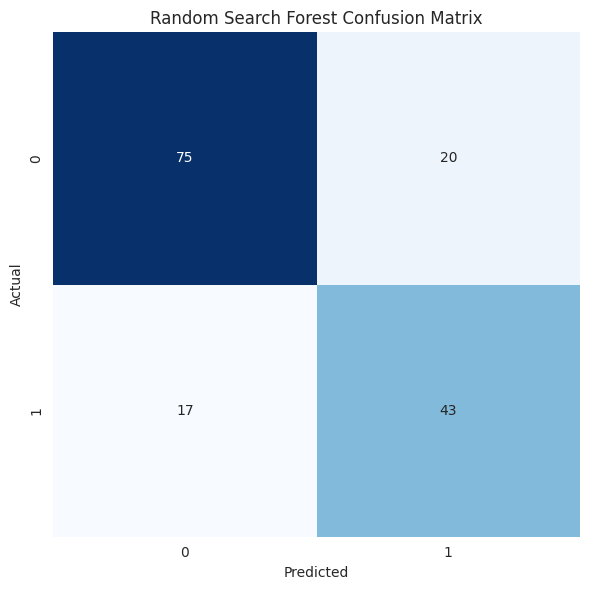

In [91]:
y_pred_rf_rs = best_rf_rs.predict(X_test)
cm_rf_rs = confusion_matrix(y_test, y_pred_rf)

print("==== Random Forest Classifier ====")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_rs):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf_rs, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf_rs, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf_rs, average='weighted'):.4f}")
print("\n" + "-"*40 + "\n")

fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm_rf_rs, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
ax.set_title('Random Search Forest Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

fig.tight_layout()
plt.show()